# 군집화(clustering)
지금까지 살펴본 분류 알고리즘은 모두 지도학습 분류 알고리즘이었다.  
군집화는 비지도학습의 일종으로, 데이터의 특징만으로 비슷한 데이터들끼리 모아 군집된 클래스로 분류한다.

## K 평균 알고리즘
K평균 알고리즘은 데이터 간의 거리를 사용해 가까운 거리에 있는 데이터끼리 하나의 클래스로 묶는 알고리즘이다.  
기본적으로 다음과 같은 순서로 진행된다.

1. 데이터 준비
2. 몇 개의 클래스로 분류할 것인지 설정
3. 클러스터의 최초 중심 설정
4. 데이터를 가장 가까운 클러스터로 지정
5. 클러스터 중심을 클러스터에 속한 데이터들의 가운데 위치로 변경
6. 클러스터 중심이 바뀌지 않을 때까지 4번부터 5번 과정을 반복적으로 수행

#### 데이터 준비
거리를 계산하기 위해 데이터는 수치화된 데이터여야 한다.

#### 몇 개의 클래스로 분류할 것인지 정하기
k 평균 알고리즘의 k는 몇 개의 클래스로 분류할 것인지를 나타내는 변수이다.

#### 클러스터의 최초 중심 설정
k 평균의 표준 알고리즘은 클러스터의 최초 중심을 무작위로 설정한다. 하지만 경우에 따라 최초 중심을 k 평균 모델에 부여할 수도 있다.  
사이킷런의 k 평균 라이브러리는 기본적으로 kmean++라는 알고리즘을 써서 클러스터의 최초 중심을 설정한다.

- 무작위로 설정
- 최초 중심값 부여
- kmean++

#### 데이터를 가장 가까운 클러스터로 설정
클러스터의 중심이 설정되면 첫 번째 데이터부터 마지막 데이터까지 순회하면서 데이터로부터 가장 가까운 클러스터로 데이터를 소속시킨다.

#### 클러스터 중심을 클러스터에 속한 데이터들의 가운데 위치로 변경
데이터의 순회가 완료되면 각 클러스터의 중심값을 실제 클러스터 내부의 데이터들의 중앙값으로 변경한다.

#### 클러스터 중심이 바뀌지 않을 때까지 4번~5번 과정을 반복적으로 수행
클러스터의 중심이 바뀌면 다시 첫 번째 데이터부터 마지막 데이터까지 순회하며, 데이터를 가장 가까운 클러스터로 소속시킨다.  
이 과종을 소속된 데이터가 변경되지 않을 때까지 또는 클러스터의 중심이 변경되지 않을 때까지 반복한다.

# 키와 몸무게에 따른 체형 군집화
이번 예제에서는 키와 몸무게로 학생들을 세 그룹으로 분류하는 예제를 만든다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## 데이터 만들기

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]

In [3]:
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


## 데이터 시각화

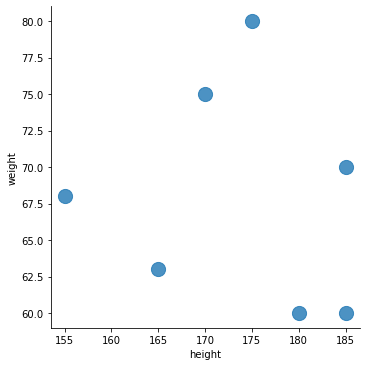

In [4]:
sns.lmplot(x='height', y='weight', data=df, fit_reg=False, scatter_kws={'s':200})

## k 평균 군집화
sklearn의 kmean 라이브러리에 데이터를 활용하여 데이터를 군집화한다.

In [5]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [6]:
kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [172.5       ,  77.5       ],
       [160.        ,  65.5       ]])

데이터가 어느 군집에 소속되어 있는지 데이터프레임 cluster_id 행에 저장한다.

In [7]:
df['cluster_id'] = kmeans.labels_

In [8]:
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,80,1


## k 평균 군집화 시각화
군집 결과는 seaborn과 dataframe을 활용하여 손쉽게 시각화 할 수 있다.
키가 작은 그룹, 중간 그룹, 큰 그룹으로 군집된 결과를 각기 다른 색으로 구분해서 확인할 수 있다.

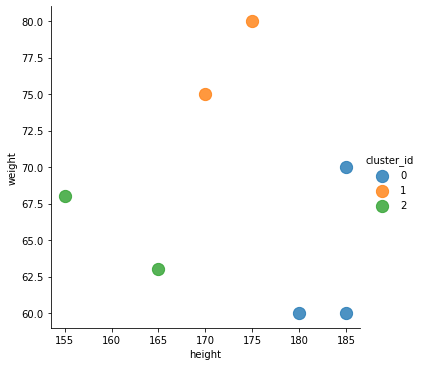

In [9]:
sns.lmplot(x='height', y='weight', data=df, fit_reg=False,
          scatter_kws={'s':150},
          hue='cluster_id')